<b><font size="10"> Titanic Notebook </font></b>

https://www.makeschool.com/mediabook/oa/tutorials/titanic-dataset-tutorial-an-intro-to-data-analysis-and-statistics-n40/correlation/

Covariance vs. Correlation
Both of these words mean that two variables are dependent on each other, but they are subtly different:

"In simple words, both the terms measure the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables." Reference: Towards Data Science Article

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn

Now that I have determined some basic stats and visuals for the data, I have an better idea of what I am working with. Now let's find some relationships between the data columns. Is survival related to price of a room? Is a price of a room relative to age? Did women and children have better rooms than men? Did old women have better rooms and therfore better survival?

Some extra information is often needed to understand the situation. What time of day did the ship sink? Were people in their rooms or was it meal time/ball time/etc. 

In [6]:
df = pd.read_csv('train.csv')
dff = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
SurvCorrAge = (df['Survived']).corr(df['Age'])
print(SurvCorrAge)
SurvCorrAge = (SurvCorrAge * 100)
print(SurvCorrAge)

-0.07722109457217759
-7.722109457217758


In [26]:
SurvCorrSex = df['Sex'].str.get_dummies().corrwith(df['Survived']/df['Survived'].max())

#Corr between survived and sex. Corrwith is for rows. dummy variables create str variable counts. We divide the two survived
#arrays because we are finding a percentage
#note that corr is not a probability so no need to percentage it, it is a value between -1 and 1

print(SurvCorrSex)

female    0.543351
male     -0.543351
dtype: float64


In [28]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


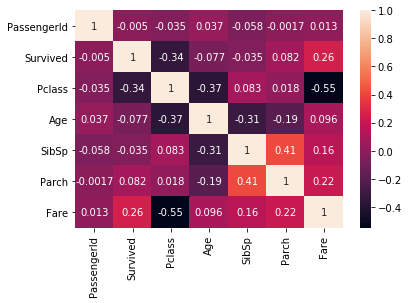

In [32]:
sn.heatmap(df.corr(), annot=True)
plt.show()

#this heatmap tells up visually about corr

In [10]:
df = df.drop(['PassengerId'], axis=1)

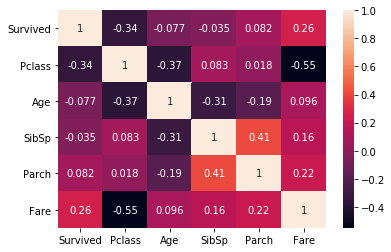

In [34]:
sn.heatmap(df.corr(), annot=True)
plt.show()

#this heatmap tells up visually about corr without the extra column

Let's address that these corr functions have only assessed numerical data. We need a conversion.

In [8]:
genders = {"male": 1, "female": 0}
data = [df, dff]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

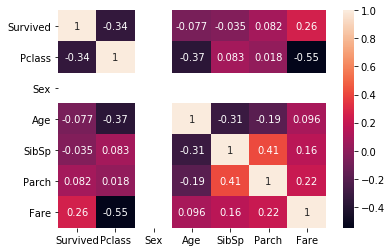

In [11]:
sn.heatmap(df.corr(), annot=True)
plt.show()